<a href="https://colab.research.google.com/github/Eshashr/My-Projects/blob/main/MachineLearningTwo_Layer_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Two Layer Network
In this assignment you will use the following code to investigate how the first layer of a network transforms the input and, ideally, renders it linearly separable for the output layer.

1) Create two binary 2-dimensional non-linearly separable datasets (you can use one you created for the last assignment).

2) Copy this notebook twice. Adapt each copy to use one of your datasets, i.e. change the file that is read in.

3) Document how effectively (in terms of accuracy) does the network learn the dataset. Try training the network multiple times to see if anything different happens.

4) Document whether the two neurons on the first layer are doing different things or basically the same thing. Does what they are doing seem sensible? Could you think of better way to use the two neurons?

5) The final plot in this notebook shows the activations on the first layer, this is the transformed input. What shape do you see? Does it look more linearly separable? Does the line of the output layer neuron look like its in a reasonable place?


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
bin_df = pd.read_csv('/content/drive/MyDrive/My Datasets/Dataset1.csv')
features = bin_df[['A', 'B']]
scaled = (features-features.min(axis=0))/(features.max(axis=0) - features.min(axis=0))
bin_df[['A', 'B']] = scaled
bin_df

,A,B,Target
0,1.00,1.00,0
1,1.00,0.75,1
2,1.00,0.25,0
3,1.00,0.00,1
4,0.75,1.00,1
5,0.75,0.75,0
6,0.75,0.25,1
7,0.75,0.00,0
8,0.25,1.00,0
9,0.25,0.75,1


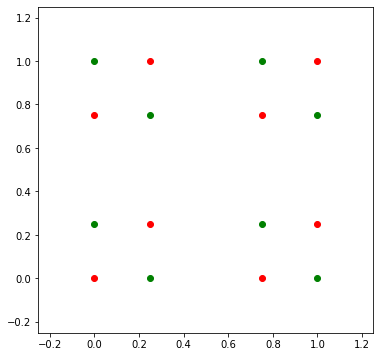

In [ ]:
positive = bin_df[bin_df['Target']==1]
negative = bin_df[bin_df['Target']==0]

plt.figure(figsize=(6,6))
plt.scatter(positive['A'], positive['B'], color='green')
plt.scatter(negative['A'], negative['B'], color='red')
plt.xlim(-0.25, 1.25)
plt.ylim(-0.25, 1.25)
plt.show()

In [ ]:
inputs = bin_df[['A','B']].values
targets = bin_df['Target'].values

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
nn = keras.Sequential()
nn.add(keras.layers.Dense(2, input_shape=(2,), activation='sigmoid'))
nn.add(keras.layers.Dense(1, activation='sigmoid'))
nn.compile(optimizer=keras.optimizers.RMSprop(0.2),
           loss=keras.losses.BinaryCrossentropy(),
           metrics=[keras.metrics.BinaryAccuracy()])
nn.fit(inputs, targets, epochs=50, callbacks=[callback])

Epoch 1/50
1/1 [==============================] - 0s 453ms/step - loss: 0.7118 - binary_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 7ms/step - loss: 0.9147 - binary_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 4ms/step - loss: 0.6999 - binary_accuracy: 0.5625
Epoch 4/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6959 - binary_accuracy: 0.5625
Epoch 5/50
1/1 [==============================] - 0s 4ms/step - loss: 0.6945 - binary_accuracy: 0.6250
Epoch 6/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6941 - binary_accuracy: 0.4375
Epoch 7/50
1/1 [==============================] - 0s 4ms/step - loss: 0.6939 - binary_accuracy: 0.5000
Epoch 8/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6937 - binary_accuracy: 0.3750
Epoch 9/50
1/1 [==============================] - 0s 4ms/step - loss: 0.6936 - binary_accuracy: 0.5000
Epoch 10/50
1/1 [==============================] - 0s 8ms/step - loss: 

3. In terms of accuracy the network learns the data set in 17 out of 50 epochs.I tried training the network multiple times and saw that each time the number of epochs change and so does that binary accuracy.

In [ ]:
input_layer_weights = nn.layers[0].get_weights()
input_layer_weights

[array([[-0.9077345, -2.2018101],
        [-1.1063855, -2.0121388]], dtype=float32),
 array([-1.6102877, -1.2360804], dtype=float32)]

In [ ]:
w0_0 = input_layer_weights[0][:,0]
w0_1 = input_layer_weights[0][:,1]
w0_0b = input_layer_weights[1][0]
w0_1b = input_layer_weights[1][1]

In [ ]:
output_layer_weights = nn.layers[1].get_weights()
output_layer_weights

[array([[ 0.24211451],
        [-0.19673797]], dtype=float32), array([0.29737234], dtype=float32)]

In [ ]:
w1_0 = output_layer_weights[0][:,0]
w1_0b = output_layer_weights[1][0]

In [ ]:
nn_zero = keras.Model(inputs=nn.input, outputs=nn.layers[0].output)
input_layer_activations = pd.DataFrame(nn_zero.predict(inputs))
input_layer_activations.columns = ['A', 'B']
input_layer_activations['Target'] = bin_df['Target']
input_layer_activations.head()

,A,B,Target
0,0.025972,0.004278,0
1,0.033967,0.007055,1
2,0.057616,0.019060,0
3,0.074604,0.031132,1
4,0.032375,0.007395,1


In [ ]:
nn_one = keras.Model(inputs=nn.input, outputs=nn.layers[1].output)
output_layer_activations = pd.DataFrame(nn_one.predict(inputs))
output_layer_activations.columns = ['Output']
output_layer_activations['Target'] = bin_df['Target']
output_layer_activations.head()

,Output,Target
0,0.575131,0
1,0.575471,1
2,0.576293,0
3,0.576717,1
4,0.575360,1


Slope: -0.8204505
Intercept: -1.455449


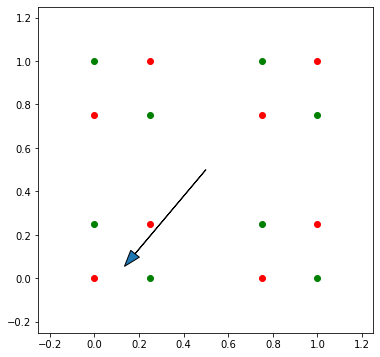

In [ ]:
# Let's separate the inputs that result in positive output from the negatives
df = bin_df
positive = df[df['Target']==1]
negative = df[df['Target']==0]

# Set the weights
weights = w0_0
bias_weight = w0_0b

# w0*x + w1*y + w2 = 0
# y = -(w0/w1)*x - (w2/w1)
slope = -weights[0]/weights[1]
intercept = -bias_weight/weights[1]

print('Slope:', slope)
print('Intercept:', intercept)

# Pull out the input weights and normalize for the weight arrow to be length 0.5
weights_norm = weights/(np.sqrt(weights.dot(weights))*2)

x_vals = np.linspace(-10, 10, 2)
y_vals = x_vals*slope + intercept

plt.figure(figsize=(6,6))
plt.scatter(positive['A'], positive['B'], color='green')
plt.scatter(negative['A'], negative['B'], color='red')
plt.plot(x_vals, y_vals)
plt.arrow(0.5, 0.5, weights_norm[0], weights_norm[1], head_width=0.05)
plt.xlim(-0.25, 1.25)
plt.ylim(-0.25, 1.25)
plt.show()

Slope: -1.0942636
Intercept: -0.6143117


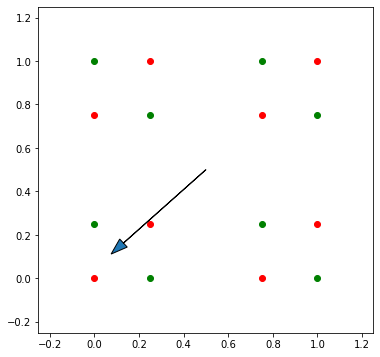

In [ ]:
# Let's separate the inputs that result in positive output from the negatives
df = bin_df
positive = df[df['Target']==1]
negative = df[df['Target']==0]

# Set the weights
weights = w0_1
bias_weight = w0_1b

# w0*x + w1*y + w2 = 0
# y = -(w0/w1)*x - (w2/w1)
slope = -weights[0]/weights[1]
intercept = -bias_weight/weights[1]

print('Slope:', slope)
print('Intercept:', intercept)

# Pull out the input weights and normalize for the weight arrow to be length 0.5
weights_norm = weights/(np.sqrt(weights.dot(weights))*2)

x_vals = np.linspace(-10, 10, 2)
y_vals = x_vals*slope + intercept

plt.figure(figsize=(6,6))
plt.scatter(positive['A'], positive['B'], color='green')
plt.scatter(negative['A'], negative['B'], color='red')
plt.plot(x_vals, y_vals)
plt.arrow(0.5, 0.5, weights_norm[0], weights_norm[1], head_width=0.05)
plt.xlim(-0.25, 1.25)
plt.ylim(-0.25, 1.25)
plt.show()

Slope: 1.2306446
Intercept: 1.5115147


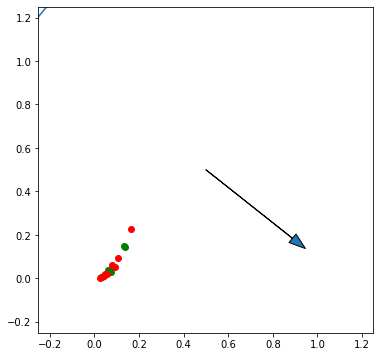

In [ ]:
# Let's separate the inputs that result in positive output from the negatives
df = input_layer_activations
positive = df[df['Target']==1]
negative = df[df['Target']==0]

# Set the weights
weights = w1_0
bias_weight = w1_0b

# w0*x + w1*y + w2 = 0
# y = -(w0/w1)*x - (w2/w1)
slope = -weights[0]/weights[1]
intercept = -bias_weight/weights[1]

print('Slope:', slope)
print('Intercept:', intercept)

# Pull out the input weights and normalize for the weight arrow to be length 0.5
weights_norm = weights/(np.sqrt(weights.dot(weights))*2)

x_vals = np.linspace(-10, 10, 2)
y_vals = x_vals*slope + intercept

plt.figure(figsize=(6,6))
plt.scatter(positive['A'], positive['B'], color='green')
plt.scatter(negative['A'], negative['B'], color='red')
plt.plot(x_vals, y_vals)
plt.arrow(0.5, 0.5, weights_norm[0], weights_norm[1], head_width=0.05)
plt.xlim(-0.25, 1.25)
plt.ylim(-0.25, 1.25)
plt.show()

3. In terms of accuracy the network learns the data set in 17 out of 50 epochs.I tried training the network multiple times and saw that each time the number of epochs change and so does that binary accuracy.

4. The two nurons in my graphs are doing the same thing they are pointed towards the same direction. Yes it seems like its sensible. We can use sigmoid activatipn for better way to use the neurons.

5. In the final graph, we can see that two red and one green is away from the clusters of the remaining dots. They are not linrearly separable and the output layer neuron doesnt look like its in a reasonable place. 